<a href="https://colab.research.google.com/github/YoungriKIM/Using_Colab/blob/main/m21_FI_RF2_cancer_plus_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

feature_names_1: 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
importances_1 : 
 [0.05656288 0.00901022 0.05404391 0.07773468 0.0051656  0.00894898
 0.0399244  0.10729468 0.00362866 0.00443952 0.01643869 0.0043426
 0.00906065 0.05721284 0.0046295  0.00426383 0.01120009 0.00660397
 0.00440251 0.00459444 0.1152244  0.01468824 0.10871056 0.1077996
 0.00904522 0.01323764 0.01715493 0.10173694 0.01382852 0.00907131]
score_1:  0.9473684210526315


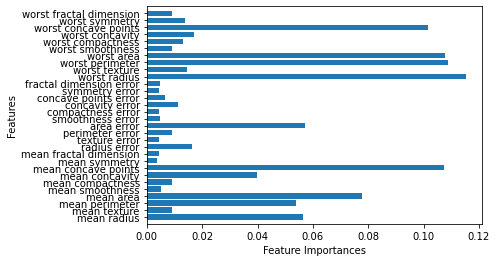

feature_names_2: 
 ['mean symmetry', 'compactness error', 'texture error', 'symmetry error', 'mean fractal dimension', 'fractal dimension error', 'smoothness error', 'mean smoothness']
importances_2 : 
 [0.0403553  0.01207709 0.04268638 0.07863633 0.00598884 0.06044641
 0.12991632 0.01416089 0.00601697 0.02567547 0.00578189 0.00429269
 0.13049383 0.01693662 0.09901857 0.11757743 0.01076318 0.01528967
 0.0218976  0.14491161 0.00882677 0.00825013]
score_2:  0.956140350877193


In [7]:
# feature_importances_를 이용해 칼럼별 중요도를 그래프로 출력해보고
# 중요도가 적은 칼럼을 삭제하여 기존과 비교해보자

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#1. 데이터 지정, 전처리
dataset = load_breast_cancer()
x = dataset.data
y = dataset.target
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=519)

#2. 모델(모델1)
model = RandomForestClassifier()

#3. 컴파일ㄴ 훈련ㅇ
model.fit(x_train, y_train)

#4. 평가(스코어)
score_1 = model.score(x_test, y_test)
print('feature_names_1: \n', dataset.feature_names)
print('importances_1 : \n', model.feature_importances_)
print('score_1: ', score_1)


# 중요도 그래프 그리기(솎기 전)
def plot_feature_importances_datasets(model):
    n_features = x.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align = 'center')
    plt.yticks(np.arange(n_features), dataset.feature_names)
    plt.xlabel('Feature Importances')
    plt.ylabel('Features')
    plt.ylim(-1, n_features)

plot_feature_importances_datasets(model)
plt.show()


# 남길 개수 정하고 솎는 함수(수현)
def cut_columns(feature_importances, columns, number):
    temp = []
    for i in feature_importances:
        temp.append(i)
    temp.sort()                 # 큰 수부터 앞으로 정렬
    temp = temp[:number]        # 내가 지정해준 개수만 반환
    result = []
    for j in temp:
        index = feature_importances.tolist().index(j)
        result.append(columns[index])       # columns는 feature_names를 지정할 예정
    return result

# x데이터를 솎은 모델을 만들자(모델2)
x2 = pd.DataFrame(dataset.data, columns = dataset.feature_names)
# 필요한 만큼만 위의 함수를 이용해 남기기
x2.drop(cut_columns(model.feature_importances_, dataset.feature_names, 8), axis=1, inplace=True)
# 내가 남긴 것들의 칼럼명 출력
print('feature_names_2: \n',cut_columns(model.feature_importances_, dataset.feature_names, 8))

# 모델2를 위한 전처리(x가 x2로 변경, random_state 동일하게 유지)
x2_train, x2_test, y_train, y_test = train_test_split(x2.values, y, test_size = 0.2, shuffle=True, random_state= 519)

#2. 모델1과 동일
model2 = RandomForestClassifier()

#3. 컴파일ㄴ 훈련ㅇ
model2.fit(x2_train, y_train)

#4. 평가(스코어)
score_2 = model2.score(x2_test, y_test)
print('importances_2 : \n', model2.feature_importances_)
print('score_2: ', score_2)

# =========================================================
# score_1:  0.9473684210526315

# score_2:  0.956140350877193